# Multi-Armed Bandits

## 1. Introduction and motivation

### Online decision-making

We return to the setting of *sequential, adaptive decision-making under uncertainty*, a topic we have already talked about in the context of false discovery rate control. There, the objective is to keep the FDR below some threshold, and the hypotheses considered are not necessarily related to each other. In this unit, however, we will consider the situation where we have to make the **same** (or similar) decision repeatedly, and where we want to **learn** from the consequenes of our earlier decisions, and thereby **improve** our subsequent decisions.

This is a paradigm that captures a large number of problems arising in scientific, business, and industrial settings. In fact, it is woven into our everyday lives. Recall the last time you tried to learn a new skill via trial and error. For the sake of concreteness, suppose you were learning how to play chess. Over the course of many games, you would learn which moves or strings of moves are more successful, which are less successful, and then adapt your gameplay to incorporate more of the successful moves. Alternatively, imagine moving to a new city and having to figure out which restaurants you like. You would probably try out a few different restaurants, and keep going back to the ones whose food you enjoyed on previous visits.

### Exploration vs exploitation

When making decisions under uncertainty, we are faced with two competing urges. On the one hand, we want to make the best choice given current knowledge (exploitation), and yet on the other hand, we want to make diverse choices in order to acquire more information with which we can improve future decisions (exploration). Balancing exploration and exploitation is a fundamental problem. Once we hit upon a promising choice (a chess strategy that seems to have a high win percentage, or a restaurant you enjoy), then it is tempting to settle down and keep making the same choice over and over again. However, doing so is to ignore the possibility that a different strategy could be more powerful, or that the new restaurant on Telegraph could be closer to your heart's desire. Conversely, if we keep trying out new options, with each new option we run the risk of it being terrible (or just bang average), and us having to pay the consequent price.

### What's a bandit?

A (multi-armed) bandit problem is a particular setting for online decision-making characterized by the following: we receive an *immediate* payoff, or **reward**, for every decision, and the payoff for each decision being completely *independent of previous decisions*. This is a pretty reasonable model for the restaurant example. We get pleasure immediately after having each meal, and it seems relatively reasonable to assume that our enjoyment of a meal is independent of the past meals that we have had. In chess, if we treat each move as a decision, then this is not such a valid assumption. We do not receive an immediate payoff from each move, but only at the end of a game, if we win. Furthermore, how much a move contributes to the probability of an eventual win depends on the state of the game, and hence on the previous moves. Chess is hence more accurately described by the paradigm of reinforcement learning, which is the topic of a future lecture.

Slightly more formally, we consider a decision-maker, or learner, who is given $K$ options to choose from. We refer to these options as *arms*. Associated with each arm is a probability distribution over rewards. Initially, this distribution is unknown to the decision-maker. The decision-maker chooses an arm, usually referred to as *pulling* an arm, and receives a reward sampled from the corresponding reward distribution. This process is repeated over and over again. A key element here is the *stochastic* nature of the reward. If we have a bad experience at a restaurant, it could be that the food is bad, or alternatively, it could just be bad luck: We may have ordered the wrong dish, or the kitchen could be having a bad day, or perhaps we were in a foul mood for other reasons. Perhaps we should then give the restaurant a few more chances before crossing it off our list.

<img src="octopus_bandit.jpeg" align="center" width="350">

The goal is to maximize the sum of rewards over all time steps. Sometimes future rewards are discounted, when rewards in the future are viewed as less valuable than more immediate rewards. A typical way to measure the quality of realized decisions is via **regret**, which is the difference between our total, realized reward, and the reward of some kind of oracle who knows more than we do. Usually, this is an oracle who knows in advance which is the optimal arm. Regret is thus a direct quantification of the opportunity cost we incur from making sub-optimal decisions.

### Bandit history

For an interesting account of the origin of this problem, we quote from the excellent textbook *Bandit Algorithms* by Tor Lattimore and Csaba Szepesvari.

<blockquote>Bandit problems were introduced by William R. Thompson in an article published in 1933 in Biometrika. Thompson was interested in medical trials and the cruelty of running a trial blindly, without adapting the treatment allocations on the fly as the drug appears more or less effective.</blockquote>

<blockquote>The name comes from the 1950s, when Frederick Mosteller and Robert Bush decided to study animal learning and ran trials on mice and then on humans. The mice faced the dilemma of choosing to go left or right after starting in the bottom of a T-shaped maze, not knowing each time at which end they would find food. To study a similar learning setting in humans, a ‘two-armed bandit’ machine was commissioned where
humans could choose to pull either the left or the right arm of the machine, each giving a random pay-off with the distribution of pay-offs for each arm unknown to the human player. The machine was called a ‘two-armed bandit’ in homage to the one-armed bandit, an old-fashioned name for a lever-operated slot machine (‘bandit’ because they steal your money).</blockquote>

### Applications

Bandit algorithms have found numerous applications. They are used in healthcare (personalization of mobile healthcare apps, Warfarin dosage), finance (portfolio selection), pricing, telecommunications, and also as subroutines of algorithms for solving other machine learning problems, such as hyperparameter optimization and reinforcement learning.

Beyond practical applications, bandit problems are also fundamental to theoretical machine learning because they capture the exploration-exploitation tradeoff problem in its most elemental state.

## 2. Mathematical formalism

We now introduce the formal mathematical setup of (stochastic) multi-armed bandits.

Let $\mathcal{A}$ denote a set of $K$ arms. We will denote the **reward distribution** for arms $a\in\mathcal{A}$ by $P_a$. We will assume that the distributions are [$1$-sub-Gaussian](http://data102.datahub.berkeley.edu/hub/user-redirect/git-sync?repo=https://github.com/ds-102/sp21&subPath=lecture/lecture17/concentration.ipynb). This is called the **environment**. The learner and the environment interact sequentially over $n$ rounds.

In each round $t \in \{1,\ldots,n\}$, the learner selects an arm $A_t$. The environment then samples a reward $X_t$ from the distribution $P_{A_t}$, and reveals $X_t$ to the learner. This interaction induces a joint distribution over the sequence of actions and outcomes $A_1,X_1,A_2,X_2,\ldots,A_n,X_n$. There are two implications of this set up:
1. $X_t$ is conditionally independent of $A_1,X_1,A_2,X_2,\ldots,X_{t-1}$ given $A_t$.
2. The learner's selection of $A_t$ is allowed to be probabililistic, i.e. a distribution $\pi_t$ over $\mathcal{A}$, but $\pi_t$ can only depend on the past ($A_1,X_1,A_2,X_2,\ldots,X_{t-1}$) and not the future ($X_t$,$A_{t+1},\ldots,A_n,X_n$).

The set of rules that the learner uses to make decisions is called a **policy**, and is often denoted with a symbol $\pi$. Mathematically, $\pi$ is a sequence of transition kernels $\{\pi_t\}_{t=1}^n$ (conditional densities of the form $\pi_t(a_t|a_1,x_1,\ldots,a_{t-1},x_{t-1})$). Don't worry if this sounds confusing. You don't have to understand this formalism in order to understand the rest of the unit.

Let $n$ denote the total number of rounds. Then, our total reward is equal to
$$S_n = \sum_{t=1}^n X_t.$$

The goal is to find the arm $a$ which has the highest corresponding mean of distribution $P_a$. Informally, we will refer to this mean as the *mean of arm $a$*, and we will denote it by

$$\mu_a := \mathbb{E}_{Z\sim P_a}[Z].$$

The highest mean will be denoted by $\mu^* := \max_a \mu_a$. The arm with the highest mean (that is $\mu^*$) will be denoted $a^* := \arg\max_a \mu_a$.


We formally define the **regret** of a policy $\pi$ as:
$$R_n = n\mu^* - \mathbb{E}[S_n].$$

In words, this is the difference between the best possible cumulative reward we could get if we knew which arm was the best one, and the expected cumulative reward from following the policy.

We also define the **suboptimality gap** for arm $a$ as:
$$\Delta_a = \mu^* - \mu_a.$$
This is the difference between the mean of the best arm, and a fixed arm $a$.

We let $T_a(t)$ denote the number of times arm $a$ is selected, up to and including time $t$:
$$T_a(t) = \sum_{s=1}^t \mathbf{1}\{A_s = a\}.$$

With these definitions, we have the following very convenient representation for the regret.

**Theorem 1 (regret decomposition):**
$$R_n = \sum_a \Delta_a \mathbb{E}[T_a(n)].$$

*Proof: Deferred to section 8.*

This says that the regret is roughly the sum over the arms of the number of times each armed is pulled times the suboptimality gap for that arm.

Finally, we define the **average reward observed** for arm $a$ up to and including time $t$:
$$\hat \mu_a(t) = \frac{1}{T_a(t)}\sum_{s=1}^t X_s \mathbf{1}\{A_s = a\}.$$

## 3. An interactive widget

Previous Data 102 staff have coded up an interactive widget to illustrate how bandit problems work. Each initialization of the widget generates an environment with $K=5$ arms. The reward distributions $P_a$ for each arm are Gaussian with different means and variances, and are shown on the right hand side. The dotted horizontal lines indicate the true means $\mu_a$ for the reward distributions, while the dots indicate $\hat{\mu}_a(t)$, the average reward observed for each arm. Using Hoeffding's inequality, we get a confidence interval for each $\mu_a$, but only the upper halves of the intervals are plotted. The upper edges of the intervals will be used to select arms in the Upper Confidence Bound (UCB) algorithm described in a later section.

The numbers $n_a = m$ indicate that arm $a$ has been pulled $m$ times. Note that upon initialization, each arm has already been pulled once. To pull an arm, click the corresponding numbered button. As you click and advance to the next iteration $t$, the plot will change to reflect the new values of $\hat{\mu}_a(t)$ and $\text{UCB}_a(t)$. Furthermore, the plot in the bottom panel changes. This is a plot of the **pseudo-regret** against time, with the first five initial pulls totally ignored. The pseudo-regret is defined as
$$
\bar{R}_n = n\mu^* - \sum_{t=1}^n \mu_{A_t}.
$$

While the regret is an expectation over the randomness in the environment and thereby also randomness in the arm selections $A_t$, the pseudo-regret conditions on the sequence of arm selections. If we average the pseudo-regret of a policy over several different runs (i.e. if we repeatedly restart and run the algorithm a few times), this gives us an approximation of the regret.

We recommend that you play around with the widget a little to familiarize yourself with it, and also to get more intuition for bandit problems.

<img src="demo_guide.png" align="center" width="800">

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import matplotlib.animation as ani
from matplotlib.widgets import Button
import functools
from UCB_interactive import BanditEnv, UCB

Random Seed: 3513


<IPython.core.display.Javascript object>


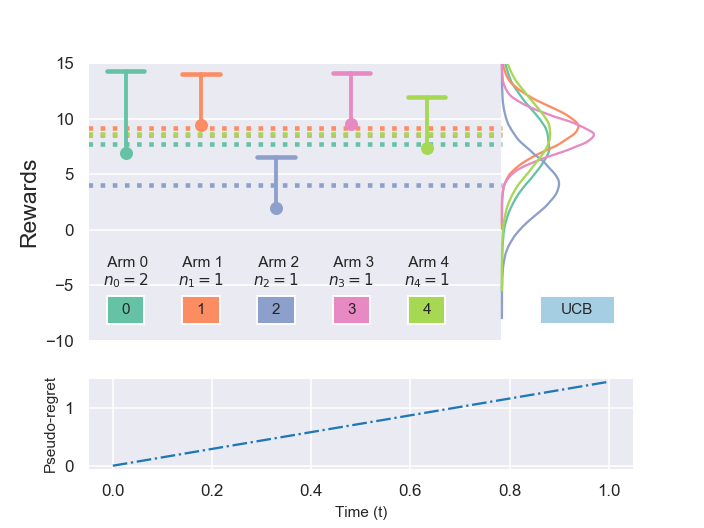

In [4]:
seed=np.random.choice(range(10000))
np.random.seed(seed)
print('Random Seed: '+str(seed))
#Number of arms sound be 2-8 (more becomes hard to plot) (5 seems to render best)
num_arms=5

#If you wand to show the distributions and pseudo-regret of algorithm
show_distributions=1
show_pseudo_regret=1
show_UCB_button=1
time_horizon=200

# Make bandit environment:
# makes a bandit environment with gaussian reward distributions.
#
#   means: [None,'rand',list]   - if means is None, the optimal arm is arm 0 and the rest are randomly generated
#                               - if means is 'rand' all arms are randomly generated
#                               - otherwise you can enter a list of means for each arm
#
#   standard_deviations: [list] - if you supply the means, you must also supply the standard deviations
#                                 of each arm as a list
#
#   delta: float                - confidence level for upper confidence bounds

means='rand'
standard_deviations=None
env=BanditEnv(num_arms, means,standard_deviations)
delta=1.0/(time_horizon)**2

# Make environment
alg=UCB(env,delta)

#Run Interactive demo
%matplotlib notebook
regret=alg.run_Interactive(show_distributions,show_pseudo_regret,show_UCB_button)

## 4. Explore-then-commit (ETC)

Recall that the goal is to minimize our regret. The old adage to "try everything at least once" makes sense here: if we do not pull every arm at least once, we may never discover the optimal arm. Indeed, because the rewards are stochastic, we should pull each arm a few times to be more certain about its mean reward. But how should we intersperse exploration steps with exploitation steps?

A natural but naive algorithm is to divide exploration and exploitation into two separate phases: In the first phase, we pull every arm $m$ times. In the second phase, we use the average reward observed for each arm in the first phase to guess which arm is the best, and thereafter keep pulling that arm. This algorithm is called **Explore-Then-Commit** (ETC).

More formally, the algorithm takes as input the parameter $m$, and when executed, iteratively chooses action $A_t$ according to
$$
A_t = \begin{cases}
(t ~\text{mod}~ K) + 1 & \quad \text{if}~ t \leq mK \\
\arg\max_a \hat{\mu}_a(mK) & \quad \text{if}~ t > mK.
\end{cases}
$$

**Theorem 2 (ETC regret):** When $1 \leq m \leq n/k$, the regret for ETC satisfies
$$
R_n \leq m\sum_{a=1}^K \Delta_a + (n-mK)\sum_{a=1}^K \Delta_a \exp\big(-\frac{m\Delta_a^2}{4}\big).
$$

*Proof: Exercise. $K=2$ case in homework 5.*

We are most interested in asymptotics, i.e. the dependence of the regret on the number of steps $n$. Of secondary importance is the dependence on the number of arms $K$ as well as the suboptimality gaps $\Delta_a$. Here, we see that for any *fixed* $m$, the regret grows *linearly* in $n$. This is bad, as we will soon see an algorithm whos regret grows only *logarithmically* in $n$.

If we are able to pick $m$ depending on the suboptimality gap and the time horizon $n$, then we can do better. In that case, we assume WLOG that $a^* = 1$, and choose $m = \frac{4\log n}{\Delta_{min}^2}$ where $\Delta_{min} = \min_{2\leq a \leq K}\Delta_a$. Plugging this into the above bound (and using $\Delta_1 = 0$) gives
$$
\begin{align}
m\sum_{a=1}^K \Delta_a + (n-mK)\sum_{a=1}^K \Delta_a \exp\big(-\frac{m\Delta_a^2}{4}\big) & = 4\log n \cdot \sum_{a=2}^K \frac{\Delta_a}{\Delta_{min}^2} + (n-mK) \sum_{a=2}^K \Delta_a\exp\big(-\log n \cdot \frac{\Delta_a^2}{\Delta_{min}^2}\big) \\
& \leq 4\log n \cdot \sum_{a=2}^K \frac{\Delta_a}{\Delta_{min}^2} + (n-mK) \sum_{a=2}^K \Delta_a\exp\big(-\log n \big) \\
& = 4\log n \cdot \sum_{a=2}^K \frac{\Delta_a}{\Delta_{min}^2} + \frac{n-mK}{n}\sum_{a=2}^K \Delta_a \\
& \leq \big(\frac{4\log n}{\Delta_{min}^2} + 1\big)\cdot \sum_{a=2}^K \Delta_a.
\end{align}
$$

The dependence on $n$ is now logarithmic, but we have cheated. In practice, it is unrealistic to assume that we know $\Delta_{min}$.

## 5. Upper confidence bound (UCB)

We now introduce an algorithm that has logarithmic regret even without knowing the suboptimality gap or the time horizon $n$. This algorithm is known the Upper Confidence Bound algorithm, or UCB for short (unfortunately UCB here does not stand for UC Berkeley...)

The problem with ETC for fixed $m$ is that we don't explore enough. UCB fixes this with the principle of **optimism in the face of uncertainty**, which states that one should act as if the environment is as nice as is plausibly possible. This is a general principle for tackling the exploration-exploitation tradeoff in online decision-making, and applies much more broadly that just to the setting of bandit problems. In the restaurant example, living at a place like Berkeley means that you are surrounded by restaurants serving many types of exotic and unfamiliar cuisines. Being optimistic means believing that these unfamiliar options are probably delicious (to you) until proven otherwise, which many people would agree is a common sense approach.

In the context of bandits, being optimistic means using the data observed so far to make an optimistic forecast, called the **upper confidence bound**, for the mean of each arm. More precisely, we set
$$
\text{UCB}_a(t,\delta) = \begin{cases}
\infty & \quad \text{if}~ T_a(t) = 0 \\
\hat{\mu}_a(t) + \sqrt{\frac{2\log(1/\delta)}{T_a(t)}} & \quad \text{otherwise}.
\end{cases}
$$
The term $\sqrt{\frac{2\log(1/\delta)}{T_a(t)}}$ is somtimes called the *exploration bonus*.

The **UCB algorithm** is defined by iteratively making the arm selection:
$$A_{t}=\Bigg\{\begin{array}{ll} {t,} & {\text { if } t\leq K}\\ {\operatorname{argmax}_{a} \text{UCB}_a(t-1,\delta_t)} & {\text { otherwise. }}\end{array}$$

In other words, we first pull every arm once, and thereafter, keep picking the arm with the highest upper confidence bound.

First, let us give some intuition as to why this is a good idea. An arm is promising if either the observed mean reward is high, or if it is not well-explored, i.e. $T_a(t)$ is small. UCB builds both of these into the criteria used to select arms. However, we need to explain why the exploration bonus has the exact form it has. This comes from the intuition that we want to persist with pulling an arm only if we are *confident* that the other arms are definitely worse. As such, we want the exploration bonus to be based on *confidence intervals* for the arm means.

Because we assumed that our reward distributions are 1-sub-Gaussian, we can apply Hoeffding's inequality. Using a calculation similar to that in Homework 5, we can use Hoeffding's inequality to show that if $Y_1,\ldots,Y_k$ are independent $1$-sub-Gaussian random variables with mean $\mu$, then

$$
\mathbb{P}\left(\mu \geq \frac{1}{k}\sum_{i=1}^k Y_i + \sqrt{\frac{2\log(1/\delta)}{k}}\right) \leq \delta
$$

After round $t$, each arm $a$ has had $T_a(t)$ independent observations, so we therefore have

$$
\mathbb{P}\left(\mu_a \geq \text{UCB}_a(t,\delta)\right) \leq \delta.
$$

As such, we see that the upper confidence bound is almost always an overestimate of the true mean.

The following theorem shows that UCB has the desired logarithmic regret.

**Theorem 3 (UCB regret):** Set $\delta_t = 1/t^3$. Then the regret of UCB is bounded by
$$
    R_n \leq 3\sum_{a=1}^K \Delta_a + \sum_{a : \Delta_a > 0} \frac{24\log(n)}{\Delta_a}
$$

*Proof: Deferred to Section 8.*

Note that logarithmic is quite remarkable as this is a very slowly growing function. This means that almost always we will pull exactly the best arm.

Although the proof of the theorem is somewhat tricky, it is very intuitive, and is based on the observation that whenever we pick a suboptimal arm $a'$, one of the following has to be true:
1. $\text{UCB}_{a'}(t, \delta_t) > \mu^*$
2. $\mu^* > \text{UCB}_{a^*}(t, \delta_t)$

The second condition happens with probability $\delta_t$, while the first condition quickly becomes unlikely as the exploration bonus for each arm shrinks to something smaller than the suboptimality gap.

## 6. Thompson sampling

ETC and UCB are both frequentist bandit algorithms. We now introduce a Bayesian algorithm, known as **Thompson Sampling (TS)**. This algorithm has a venerable history. It was introduced by Thompson in the same 1933 paper that introduced bandit problems. Despite this, it remains very popular in practice. As a Bayesian algorithm, it is able to incorporate prior information, and selects arms by making use of posterior distributions as opposed to confidence intervals.

**Notation:** Before stating the algorithm, we need to change the notation. Because we are being Bayesian, we need to be even more careful about what we are conditioning on. Hence, we assume an $n\times K$ matrix $X$ of *potential* rewards, where all entries are independent, and $X_{ij} \sim P_j$ for each $i$ and $j$ (i.e. the entries in column $j$ are drawn from the reward distribution for arm $j$.) Finally, note that we recover the old model by setting the observered reward at time $t$, $X_t$, to be equal to $X_{T_{A_t}(t),A_t}$ under this new notation.

To set up Thompson Sampling, we will need a prior $\pi_a$ for the mean of each arm, as well as a likelihood for the rewards. It is typical to use a Beta-Bernoulli or Normal-Normal conjugate pair. Note that the model *does not has to be the same as the true reward distribution*.

Next, at each round $t$, we consider the posterior distribution over $\mu_a$, for each arm $a \in \{ 1,...,K\}$,  given all the samples you have observed from that arm $X_{1,a},...,X_{T_a(t-1),a}$:
$$P_{a,t}=\mathbb{P}(\mu_a | X_{1,a},...,X_{T_a(t-1),a}).$$

The algorithm can now be written as follows.

**Thompson sampling algorithm**: At each round $t$
1. Draw a posterior sample for each arm: $\mu_{a,t} \sim  P_{a,t}$ for $a \in \{1,...,K\}$.
2. Choose the arm with the largest sample:
$ A_t=\underset{1 \leq a \leq K}{\operatorname{argmax}} \mu_{a,t}$

In other words, the probability we assign to choosing arm $a$ is the probability that it is the largest arm under the posterior on all of the data.

The following theorem shows that asymptotically, TS also produces logarithmic regret.

**Theorem 4 (TS regret):** The regret of TS satisfies
$$
\lim_{n\to\infty} \frac{R_n}{\log n} = \sum_{a: \Delta_a > 0} \frac{2}{\Delta_a}.
$$

*Proof: Complicated and beyond the scope of this course. Refer to the textbook [1].*

This is a nice property, and is unsurprising. In the limit of infinite samples, the effect of the prior gets washed out by the likelihood, and posterior distributions start to mostly resemble frequentist confidence intervals. As such, the algorithm should behave very similarly to UCB in this regime.

## 7. Comparison of UCB and TS

In this section, we compare the performance of UCB and TS empirically. The following figure plots the regret over time of four different algorithms applied to the same bandit environment.
1. UCB
2. TS with a good prior (prior means are in the same order as the true arm means)
3. TS with a bad prior (prior means are in the reverse order as the true arm means)
4. TS with the same prior for all arms

You will be producing the same plot for Lab 8, so we defer most of the simulation details to that lab, and instead comment about the broad take-aways.

<img src="regret.png" align="center" width="800">

First, notice that the performance of all the methods does seem to be logarithmic in time, as suggested by the theory. Second, the performance of TS varies greatly depending on the choice of prior. With a good prior, it performs better than UCB, but with a bad prior, it performs worse. On the other hand, when the prior is the same for all the arms, and hence does not add any information about their ordering, TS still seems to perform better than UCB.

This last observation agrees with our comparison of the regret bounds in Theorem 3 and in Theorem 2. We see that the TS regret bound is smaller. This leads us to ask the question: Is TS just universally better than UCB, or frequentist methods in general?

The answer to that is a little subtle. We actually stated a *simple* version of UCB which is simple to state and simple to analyze. There are more sophisticated versions of UCB that do not require knowing the time horizon, and whose regret is even smaller than that of TS. Furthermore, we were somewhat kind in the simulation, and used a Gaussian likelihood that was exactly the same as the reward distributions (apart from not knowing the mean).

## 8. Proofs

**Proof of Regret Decomposition:** Observe that $R_n$ is based on summing over rounds, while the quantity on the right hand side is based on summing over actions. To convert one sum into the other one, we introduce indicators. Note that for any fixed $t$, $\sum_{a\in\mathcal{A}} \mathbf{1}\{A_t = a\} = 1$, so that
$$
\begin{align}
n\mu^* - \sum_{t=1}^n X_t & = \sum_{t=1}^n (\mu^* - X_t) \\
& = \sum_{t=1}^n \sum_{a\in\mathcal{A}} \mathbf{1}\{A_t = a\} (\mu^* - X_t) \\
& = \sum_{a\in\mathcal{A}} \sum_{t=1}^n  \mathbf{1}\{A_t = a\} (\mu^* - X_t).
\end{align}
$$
Taking expectations and applying the tower property, we get
$$
\begin{align}
R_n & = \mathbb{E}[n\mu^* - \sum_{t=1}^n X_t] \\
& = \sum_{a\in\mathcal{A}} \mathbb{E}\left[\sum_{t=1}^n \mathbb{E}[\mathbf{1}\{A_t = a\} (\mu^* - X_t)|A_t] \right].
\end{align}
$$


We next compute
$$
\begin{align}
\mathbb{E}[\mathbf{1}\{A_t=a\}(\mu^*-X_t)|A_t] & = \mathbb{E}[\mu^*-X_t|A_t]\mathbf{1}\{A_t=a\} \\
& = (\mu^*-\mu_{A_t})\mathbf{1}\{A_t=a\} \\
& = (\mu^*-\mu_a)\mathbf{1}\{A_t=a\} \\
& = \Delta_a \mathbf{1}\{A_t=a\}.
\end{align}
$$
As such, for each action $a$, the quantity inside the expectation is
$$
\sum_{t=1}^n \mathbb{E}[\mathbf{1}\{A_t = a\} (\mu^* - X_t)|A_t] = \Delta_a \sum_{t=1}^n\mathbf{1}\{A_t=a\} = \Delta_a T_a(n).
$$
Plugging this back into the expectation completes the proof. $\blacksquare$

**Proof of Theorem 3 (UCB regret, optional):** We first claim that if $A_t = a$, then at least one of the following three events must be true:

$$
\begin{array}{l}{\hat{\mu}_{a^{*}, T_{a^{*}}(t-1)}+\sqrt{\frac{6 \log t}{T_{a^{*}}(t-1)}} \leq \mu^{*}} ~~(E_1)\\ 
{\hat{\mu}_{a, T_{a}(t-1)}>\mu_{a}+\sqrt{\frac{6\log t}{T_{a}(t-1)}}} ~~(E_2)\\ 
{T_{a}(t-1)<\frac{24}{\Delta_{a}^{2}} \log (t)} ~~(E_3)\end{array}.
$$
Suppose $E_1,E_2$ and $E_3$ are all false, then we must have
$$
\begin{aligned} \hat{\mu}_{a^{*}, T_{a^{*}}(t-1)}+\sqrt{\frac{6 \log t}{T_{a^{*}}(t-1)}} &>\mu^{*} \\
&=\mu_{a}+\Delta_{a} \\ & \geq \mu_{a}+2 \sqrt{\frac{6\log t}{T_{a}(t-1)}} \\ 
& \geq \hat{\mu}_{a, T_{a}(t-1)}+\sqrt{\frac{6\log t}{T_{a}(t-1)}} \end{aligned}.
$$
This implies $A_t\neq a$, a contradiction.

Denote $u:=\lceil \frac{24}{\Delta_a^2}\log(n)\rceil$. Then:
$$\begin{aligned} \mathbb{E}\left[T_{a}(n)\right] &=\mathbb{E} \left[\sum_{t=1}^{n} \mathbf{1}\left\{A_{t}=a \text { and }E_3 \text { is true at time } t\right\}+\mathbf{1}\left\{A_{t}=a \text { and }E_3 \text { is false at time } t\right\} \right]
\\ & \leq u+\mathbb{E} \sum_{t=u+1}^{n} \mathbf{1}\left\{A_{t}=a \text { and }E_3 \text { is false at time } t\right\} \\ & \leq u+\mathbb{E} \sum_{t=u+1}^{n} \mathbf{1}\{E_1 \text { or }E_2 \text { is true at time } t\} \\ & \leq u+\sum_{t=u+1}^{n} \mathbb{P}(E_1 \text { is true at time } t)+\mathbb{P}(E_2 \text { is true at time } t). \end{aligned}$$

We now upper bound $\mathbb{P}(E_1 \text{ is true at time } t)$ by a union bound over all possible values of $T_a(t-1)$:
$$\begin{aligned} \mathbb{P}(E_1\text { is true at time } t) & \leq \mathbb{P}\left(\exists s \in\{1, \cdots, t\}: \hat{\mu}_{a^{*}, s}+\sqrt{\frac{6 \log t}{s}} \leq \mu^{*}\right) \\ & \leq \sum_{s=1}^{t} \mathbb{P}\left(\hat{\mu}_{a^{*}, s}+\sqrt{\frac{6 \log t}{ s}} \leq \mu^{*}\right) \\ & \leq \sum_{s=1}^{t} \frac{1}{t^{3}} \\ &=\frac{1}{t^{2}}, \end{aligned}$$
where we apply Hoeffding's inequality. Similarly we have:
$$\mathbb{P}(E_2\text { is true at time } t)\leq \frac{1}{t^2}.$$
Because $\sum_{t=u+1}^n \frac{1}{t^2}\leq \frac{1}{n} - \frac{1}{u}\leq \frac{1}{n}$, we can conclude:
$$\mathbb{E}\left[T_{a}(n)\right] \leq \lceil\frac{24}{\Delta_{a}^{2}} \log (n)\rceil+\frac{2}{n} \leq \frac{24}{\Delta_{a}^{2}} \log (n)+3.$$
Multiplying by $\Delta_a$ and summing over $a$ gives:
$$
    R_n \leq 3\sum_{a=1}^K \Delta_a + \sum_{a : \Delta_a > 0} \frac{24\log(n)}{\Delta_a}.
$$

## 9. Other bandit problems: Putting stochastic bandits in context

In this unit so far, we have discussed a type of bandit problem called stochastic multi-armed bandits. In the literature, there are actually many more types of bandit problems, which we briefly discuss in this section. The material in this section will not be tested in homework or on the midterm.

**Adversarial bandits:** Instead of assuming that the rewards are stochastic, i.e. drawn from some distribution, we assume that they are adversarial. This means that we allow the rewards to be completely arbitrary. This type of bandit problem has deep connections to game theory, and is perhaps more reflective of situations where there is competition between agents, though this is subject to [debate](https://www.chrisstucchio.com/blog/2014/adversarial_bandit_is_not_statistics_problem.html).

**Contextual bandits:** In some situations, the learner has access to side information in each round that is correlated with the rewards for different arms *for that round*, and can hence be used to inform the choice of action. This information, usually denoted $C_t$, is known as the *context*. For instance, in the restaurant example, if we are craving fried chicken at a given moment, then we are more likely to be fulfilled if we have fried chicken, as opposed to some other meal. Mathematically, the reward in round $t$ is given by $X_t = r(C_t,A_t) + \eta_t$, where $r$ is a reward function, and $\eta_t$ is mean zero noise.

**Linear bandits:** Instead of having actions be a choice of arm, the action here is a choice of a vector $A_t \in \mathbb{R}^d$. The reward is generated according to $X_t = A_t^T\theta^* + \eta_t$ for some fixed vector $\theta^*$. This is also sometimes called online linear regression.

**Non-stationary bandits:** Here, we assume that the arm reward distributions $P_a$ can change over time. This is a better model for dynamic environments.

**Structured bandits:** To see an example of structured bandits, consider the following example of path planning.

<img src="path_planning.png" align="center" width="600">

The goal is to get from the leftmost point to the rightmost point, with minimum loss incurred. Each segment of the path, which corresponds to an edge in the above graph, corresponds to some loss $\ell_i$. If we don't know the values of $\ell_i$ a priori, we could model this as a bandit problem, in which case we want to try out different paths and minimize the loss incurred by taking a path. In this case, arms correspond to different paths. If we get to see the losses as we go along, after crossing each edge, then we model this as a semi-bandit problem. In this case, we can associate losses with each segment of the road, which allows for more efficient learning, because in the full bandit setting we only observe the total loss once we take a whole path. Finally, we could also have full information available before having to explore different paths. In that case, we model the path planning problem as a standard supervised optimization problem, where we want to find the path minimizes the overall loss along that path.

## 10. Conclusion: The importance of model checking

We have seen in this unit that the topic of bandit problems is both mathematically rich, and also has many practical applications. Going along with the theme of this course, whenever we wish to apply bandit algorithms such as UCB, it is important to ask whether the environment we are assuming is actually a good model of reality. For instance, while we have viewed the restaurant example as a stochastic multi-armed bandit problem, there are some issues with doing so.
1. The quality of the restaurant is not static, but evolves with changes in the kitchen staff or the management.
2. As mentioned in the previous section, we have access to context. This includes our own fleeting cravings and spur-of-the-moment feelings, and also our current location in the city, who we are eating with, etc.
3. Our preference for different restaurants are not independent, but are highly correlated. If we try a dim sum restaurant and enjoy it, then we probably will also enjoy other dim sum restaurants.

We may want to *expand* our bandit environment model to account for issues 1 and 2. When doing this, however, we have to account for the bias-variance tradeoff: A larger model means that there is more to learn, and we might require many more samples before we converge on the optimal policy. The 3rd issue here actually *helps* us, because it gives structure to an otherwise impossibly large action space. By some accounts, there are about 7000 restaurants in the Bay Area, and we will probably never come close to trying all of them. However, I don't need to try all of the hot pot restaurants before concluding that I don't like hot pot.

This discussion gives further evidence that the interplay between models, assumptions, bias and variance is a central theme of data science, and makes it as much art as science.

## Bibliography

[1] Lattimore, Tor and Szepesvari, Csaba. *Bandit Algorithms*. Cambridge University Press, 2020